# Примеры использования пакета QclSolver

## Моделирование ИК ККЛ

QclSolver использует пакет aftershoq для задания материалов и структур.
Подробное описание пакета можно найти по ссылке: https://github.com/mfranckie/aftershoq

Пример создания структуры ККЛ:

In [1]:
from aftershoq.structure import Structure
from aftershoq.materials import *


qcl01 = Structure(T = 293)         #Определение структуры

qcl01.setIFR(0.1, 10)              #Задание параметров для рассеяния на границах интерфейсов

alinas = AlInAs(T = qcl01.TL)      #Определение материалов слоев структуры
gainas = InGaAs(T = qcl01.TL)


#Добавление слоев по-одному, начиная с барьерного слоя

qcl01.addLayerWM(4.0,alinas)       # <====== Барьерный слой
qcl01.addLayerWM(1.67, gainas)
qcl01.addLayerWM(0.86,alinas)
qcl01.addLayerWM(5.06, gainas)
qcl01.addLayerWM(0.92,alinas)
qcl01.addLayerWM(4.66, gainas)
qcl01.addLayerWM(1.04,alinas)
qcl01.addLayerWM(3.93, gainas)
qcl01.addLayerWM(1.76,alinas)
qcl01.addLayerWM(3.2, gainas)
qcl01.addLayerWM(1.71,alinas)
qcl01.addLayerWM(2.84, gainas)
qcl01.addLayerWM(1.91,alinas)
qcl01.addLayerWM(2.74, gainas) #13 <---- Слой ненулевым уровнем легирования
qcl01.addLayerWM(2.78,alinas)  #14 <---- Слой ненулевым уровнем легирования
qcl01.addLayerWM(2.55, gainas)

#Задание профиля легирования (1.8*10^17 для слоев 13 и 14)

dop = 0.181e18         
idop = [13, 14]

[qcl01.addDoping(0, qcl01.layers[i].width, dop, i) for i in idop]


[None, None]

Печать параметров слоев созданной структуры:

In [2]:
print(qcl01)

[width, Material, eta, lambda] (id=0)
[4.0, Al_0.48InAs, 0.1, 10]
[1.67, In_0.53GaAs, 0.1, 10]
[0.86, Al_0.48InAs, 0.1, 10]
[5.06, In_0.53GaAs, 0.1, 10]
[0.92, Al_0.48InAs, 0.1, 10]
[4.66, In_0.53GaAs, 0.1, 10]
[1.04, Al_0.48InAs, 0.1, 10]
[3.93, In_0.53GaAs, 0.1, 10]
[1.76, Al_0.48InAs, 0.1, 10]
[3.2, In_0.53GaAs, 0.1, 10]
[1.71, Al_0.48InAs, 0.1, 10]
[2.84, In_0.53GaAs, 0.1, 10]
[1.91, Al_0.48InAs, 0.1, 10]
[2.74, In_0.53GaAs, 0.1, 10]
[2.78, Al_0.48InAs, 0.1, 10]
[2.55, In_0.53GaAs, 0.1, 10]



Решение задачи в пакете qclSolver:

In [6]:
from qclsolver import qclSolver

model = qclSolver(qcl01)                   # Определение модели структуры qcl01 для начала решения 

model.setPotential(60 *1000)               # Задание потенциала 60,000[V/cm]

model.SPSolve()                            # Нахождение волновых функций

model.RESolve(ncpu=4)                      # Решение скоростных уравнений (Занимает много времени)

model.generatePlotOutput(7,10,False)       # Построение графиков

lam, __ = model.findMaxGain(7,10)          # Нахождение пика усиления между 7 и 10 мкм

model.optPower(lam)                        # Нахождение мощности излучения для пика усиления

model.generateParOutput()                  # Вывод всех найденных параметров

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.nd

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class '

Process SpawnPoolWorker-1:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:


KeyboardInterrupt: 

## Нахождение времени жизни уровня в квантовой яме

Задание структуры:

In [10]:
from aftershoq.structure import Structure
from aftershoq.materials import *

struct = Structure(T = 293)         # Определение структуры

struct.setIFR(0.1, 10) 

well = GaAs(T = struct.TL)
bar1 = AlGaAs(x = 0.3,T = struct.TL)
bar2 = AlGaAs(x = 0.5,T = struct.TL)

# Задание слоев 

struct.addLayerWM(0.001,bar2)          
struct.addLayerWM(20.,bar1)
struct.addLayerWM(5.,well)          # <======= толщина ямы 5нм
struct.addLayerWM(20.,bar1)

dop = 0.                            # Нулевая степень легирования
idop = [0]
[struct.addDoping(0, struct.layers[i].width, dop, i) for i in idop]

[None]

Нахождение времен жизни уровней:

In [11]:
from qclsolver import qclSolver

model = qclSolver(struct)                 # Определение модели

model.setPotential(0)                     # Нулевой потенциал
#model.SPSolve(iteration=1)                # Нахождение волновых функций
#model.generatePlotOutput(7,10,False)      # График

#times = model.findLifeTimes(ncpu=4)       # Нахождение времен жизни уровней
#print(times)

In [10]:
import matplotlib.pyplot as plt

plt.plot(times)
plt.yscale("log")
plt.title("Времена жизни стационарных уровней")
plt.show()

NameError: name 'times' is not defined

Времена жизни без учета нижнего уровня:

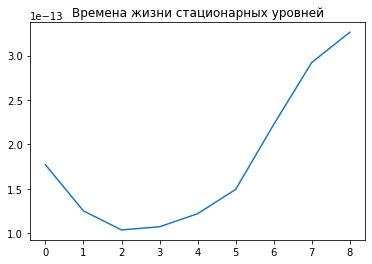

In [8]:
plt.plot(times[:-1])
plt.title("Времена жизни стационарных уровней")
plt.show()

In [26]:
model.comp[0][model.comp[0] ==None]

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

In [19]:
type(model.comp[0][550])

NoneType

In [20]:
model.comp[0][550] == None

True